## Recalling the last time I studied this

Let me explain if you didn't read the project proposal. Several years before taking this AI/ML course, I performed a study to explain why electricity demand varies by day. It's a very basic question that if one can't answer then one doesn't have any business explaining anything else that goes on in electricity markets. I inherited the study using Heating Degree Days and Cooling Degree Days, and re-implemented it with a few more predictors like day of week and holidays.

I used Excel's multiple linear regression on just a few summarized raw features, and it worked pretty well. I thought it was hot stuff, but my boss was a professor in Econometrics and said "don't show this to anybody before seeing me". Unfortunate events intervened and I was unable to ever have her review it, so I still don't know what errors she saw, but here I'll try to recreate it here **making the same mistakes**. 


## Run time:  10 seconds

In [1]:
import pandas as pd
import numpy as np

# load from local CSV
target_df = pd.read_csv("dataframes/target_df.csv.gz", compression="infer", parse_dates = ["opday"])

# Load from github
#target_df = pd.read_csv("https://github.com/k5dru/CPSC_5383/blob/main/dataframes/target_df.csv.gz?raw=true", compression="gzip", parse_dates = ["opday"])


In [2]:
target_df = target_df[['sum_spp_load', 'is_Thursday', 'is_Saturday', 'is_Sunday', 'is_holiday', 'SUM_CDD', 'SUM_HDD' ]]
target_df


,sum_spp_load,is_Thursday,is_Saturday,is_Sunday,is_holiday,SUM_CDD,SUM_HDD
0,566229.834662,0,1,0,0,4.38,73.32
1,552166.723416,0,0,1,0,2.94,66.66
2,596751.461994,0,0,0,0,4.02,61.62
3,622735.355003,0,0,0,0,1.32,28.14
4,645464.796588,0,0,0,0,5.58,18.90
...,...,...,...,...,...,...,...
1530,686175.786000,0,0,0,0,24.00,225.60
1531,648146.557000,0,1,0,0,9.78,149.46
1532,661993.471000,0,0,1,0,22.74,191.22
1533,752393.427000,0,0,0,0,27.60,228.12


In [3]:
## separate independent and dependent variables


In [4]:
# Referencing https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/

# separate the target, or dependent, attribute from the predicting attributes
X = target_df.drop('sum_spp_load',axis=1)
# separate the target attribute into Y for model training 
y = target_df['sum_spp_load']

In [5]:
# from https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9


In [6]:
import statsmodels.api as sm # import statsmodels 

#X = df["RM"] ## X usually means our input variables (or independent variables)
#y = target["MEDV"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sum_spp_load   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     2076.
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:32:23   Log-Likelihood:                -18161.
No. Observations:                1535   AIC:                         3.634e+04
Df Residuals:                    1528   BIC:                         3.637e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         5.97e+05   1945.936    306.791      0.000    5.93e+05    6.01e+05
is_Thursday  7371.9014   2528.396      2.916      0.004    2412.407    1.23e+04
is_Saturday  -3.25e+04   2523.180    -12.880      0.000   -3.74e+04   -2.76e+04
is_Sunday   -4.912e+04   2516.331    -19.519      0.000   -5.41e+04   -4.42e+04
is_holiday   -5.56e+04   5505.074    -10.100      0.000   -6.64e+04   -4.48e+04
SUM_CDD      3358.3272     31.187    107.684      0.000    3297.153    3419.501
SUM_HDD       219.9065      9.170     23.980      0.000     201.919     237.894
==============================================================================
Omnibus:                        8.532   Durbin-Watson:                   0.697
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.485
Skew:                           0.179   Prob(JB):                       0.0144
Kurtosis:                       3.071   Cond. No.                         898.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## I got better results by adding a sequence number as a predictor, because historically electric demand has grown over time.
The sequence number can cause a slightly better fit on growth over time. However, there is nothing that suggests that growth is linear.  

## How can I show that the sequence number is showing demand growth over time but isn't simply tying together similar days?

In [7]:
X = target_df.drop('sum_spp_load',axis=1)
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
X['sequence_num'] = X.index

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sum_spp_load   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     2069.
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:32:23   Log-Likelihood:                -18057.
No. Observations:                1535   AIC:                         3.613e+04
Df Residuals:                    1527   BIC:                         3.617e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.791e+05   2177.811    265.928      0.000    5.75e+05    5.83e+05
is_Thursday   7445.1196   2363.138      3.151      0.002    2809.781    1.21e+04
is_Saturday  -3.251e+04   2358.257    -13.784      0.000   -3.71e+04   -2.79e+04
is_Sunday    -4.928e+04   2351.881    -20.953      0.000   -5.39e+04   -4.47e+04
is_holiday   -5.518e+04   5145.322    -10.725      0.000   -6.53e+04   -4.51e+04
SUM_CDD       3296.5087     29.442    111.966      0.000    3238.758    3354.260
SUM_HDD        211.3100      8.590     24.599      0.000     194.460     228.160
sequence_num    27.0400      1.814     14.906      0.000      23.482      30.598
==============================================================================
Omnibus:                       17.260   Durbin-Watson:                   0.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.076
Skew:                           0.187   Prob(JB):                     4.37e-05
Kurtosis:                       3.417   Cond. No.                     5.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##  To the best of my memory, these numbers fairly well match my previous results. 

## Plot modeled vs. actual. 

In [8]:
# scatter plot true vs. predicted values 
import pylab as pl
%matplotlib inline
from pylab import *

def myplot (algorithm, x_axis, y_axis):
    pl.figure(figsize=(8, 6), dpi=120)
    pl.scatter(x_axis, x_axis,  c="y", label='true', s=1)
    pl.scatter(x_axis, y_axis,  c="b", label=algorithm, s=1)
    pl.legend()
    plt.xlabel("True Demand")  # custom x label using matplotlib
    plt.ylabel("Modeled Demand")
    pl.show()

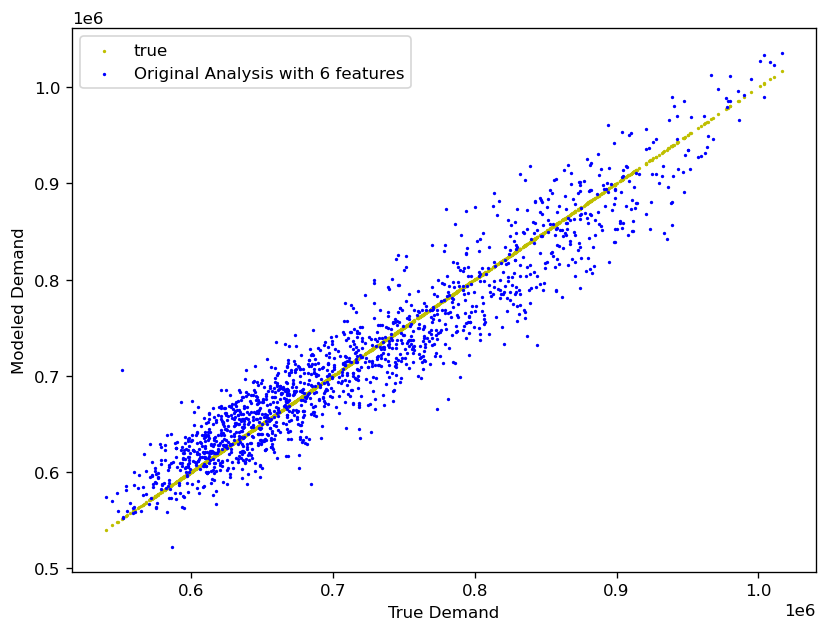

In [9]:
myplot ("Original Analysis with 6 features", y, predictions)      

# What if I used EVERYTHING in my target DF all at once?
I know, curse of dimensionality, strong colinearity, etc.  Not advised. But what does the model do? 

In [10]:
# what if I used EVERYTHING in my original DF? 
target_df = pd.read_csv("dataframes/target_df.csv.gz", compression="infer", parse_dates = ["opday"])

y = target_df['sum_spp_load']
X = target_df.drop(['sum_spp_load', 'opday'],axis=1)
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

X['sequence_num'] = X.index

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sum_spp_load   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:32:24   Log-Likelihood:                -16824.
No. Observations:                1535   AIC:                         3.434e+04
Df Residuals:                    1187   BIC:                         3.620e+04
Df Model:                         347                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   18.9101      1.107     17.077      0.000      16.737      21.083
is_Friday                             1.127e+04   1131.949      9.955      0.000    9047.762    1.35e+04
is_Monday                             3409.6560   1139.884      2.991      0.003    1173.244    5646.068
is_Saturday                          -2.314e+04   1094.865    -21.131      0.000   -2.53e+04    -2.1e+04
is_Sunday                            -3.833e+04   1115.631    -34.355      0.000   -4.05e+04   -3.61e+04
is_Thursday                           1.631e+04   1105.888     14.748      0.000    1.41e+04    1.85e+04
is_Tuesday                            1.477e+04   1125.380     13.125      0.000    1.26e+04     1.7e+04
is_Wednesday                          1.572e+04   1103.665     14.247      0.000    1.36e+04    1.79e+04
holiday_Christmas Day                -8938.1865   7170.778     -1.246      0.213    -2.3e+04    5130.625
holiday_Christmas Eve                 2.354e+04   7662.678      3.072      0.002    8507.288    3.86e+04
holiday_Day After Thanksgiving       -8034.2868   7760.117     -1.035      0.301   -2.33e+04    7190.788
holiday_Independence Day             -1.277e+04   8512.430     -1.500      0.134   -2.95e+04    3933.617
holiday_Labor Day                    -2.087e+04   8673.593     -2.406      0.016   -3.79e+04   -3855.418
holiday_Memorial Day                 -4082.0902   8456.578     -0.483      0.629   -2.07e+04    1.25e+04
holiday_New Year's Day                5593.4113   7455.747      0.750      0.453   -9034.500    2.02e+04
holiday_Thanksgiving                  -1.71e+04   7580.616     -2.256      0.024    -3.2e+04   -2228.886
is_holiday                           -4.266e+04   2754.252    -15.489      0.000   -4.81e+04   -3.73e+04
TMIN_AR_FAYETTEVILLE_DRAKE_FLD         574.9363    268.744      2.139      0.033      47.670    1102.202
TMIN_AR_FT_SMITH_RGNL_AP               431.6443    476.861      0.905      0.366    -503.941    1367.229
TMIN_AR_HARRISON_BOONE_CO_AP          -814.8388    508.521     -1.602      0.109   -1812.539     182.861
TMIN_AR_HOT_SPRINGS_ASOS               446.4509    438.921      1.017      0.309    -414.697    1307.599
TMIN_AR_LITTLE_ROCK                   -562.5601    457.183     -1.230      0.219   -1459.536     334.416
TMIN_AR_LITTLE_ROCK_AP_ADAMS_FLD       806.8846    479.783      1.682      0.093    -134.433    1748.202
TMIN_AR_MOUNTAIN_HOME_BAXTER_AP        256.8569    397.233      0.647      0.518    -522.500    1036.213
TMIN_AR_MOUNT_IDA_ASOS                -282.0895    339.083     -0.832      0.406    -947.358     383.179
TMIN_AR_TEXARKANA_WEBB_FLD             567.4478    348.865      1.627      0.104    -117.013    1251.909
TMIN_CO_ALAMOSA_SAN_LUIS_AP           

# plot again

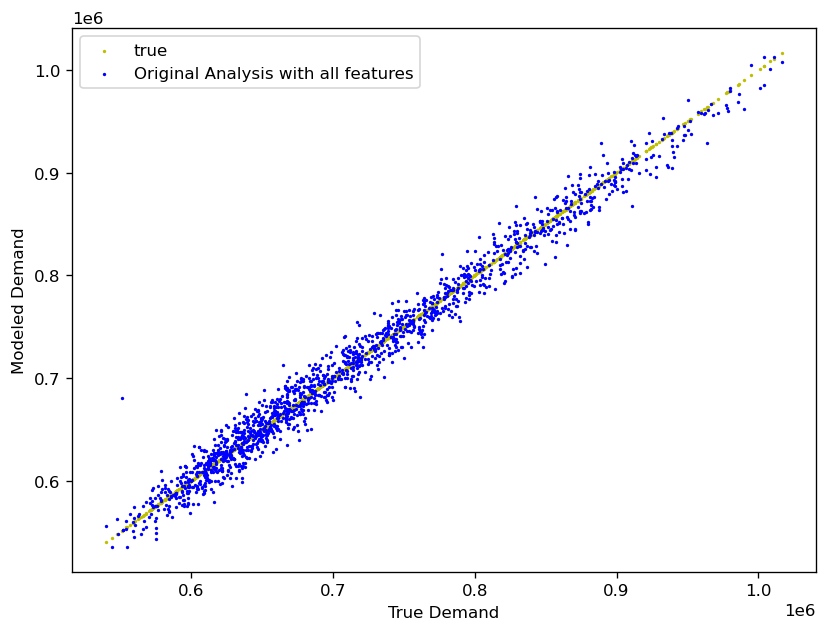

In [11]:
myplot ("Original Analysis with all features", y, predictions)      

## What if I normalize the predictors and target first? 


In [12]:
# what if I used EVERYTHING in my original DF? 
# target_df = pd.read_pickle("dataframes/target_df.pickle.gz", compression="infer").dropna()

# load from local CSV
target_df = pd.read_csv("dataframes/target_df.csv.gz", compression="infer", parse_dates = ["opday"])

y = target_df['sum_spp_load']
X = target_df.drop(['sum_spp_load', 'opday'],axis=1)
X['sequence_num'] = X.index

# normalize predictor variables
X=(X-X.min())/(X.max()-X.min() + 0.0001)  # small constant to prevent div/0

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# normalize target variable
y=(y-y.min())/(y.max()-y.min())

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sum_spp_load   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:32:25   Log-Likelihood:                 3244.9
No. Observations:                1535   AIC:                            -5794.
Df Residuals:                    1187   BIC:                            -3937.
Df Model:                         347                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.0076      0.003      2.942      0.003       0.003       0.013
is_Friday                                0.0247      0.002     10.251      0.000       0.020       0.029
is_Monday                                0.0082      0.002      3.385      0.001       0.003       0.013
is_Saturday                             -0.0475      0.002    -20.418      0.000      -0.052      -0.043
is_Sunday                               -0.0793      0.002    -33.660      0.000      -0.084      -0.075
is_Thursday                              0.0353      0.002     15.045      0.000       0.031       0.040
is_Tuesday                               0.0321      0.002     13.523      0.000       0.027       0.037
is_Wednesday                             0.0341      0.002     14.441      0.000       0.029       0.039
holiday_Christmas Day                   -0.0188      0.015     -1.246      0.213      -0.048       0.011
holiday_Christmas Eve                    0.0494      0.016      3.072      0.002       0.018       0.081
holiday_Day After Thanksgiving          -0.0169      0.016     -1.035      0.301      -0.049       0.015
holiday_Independence Day                -0.0268      0.018     -1.500      0.134      -0.062       0.008
holiday_Labor Day                       -0.0438      0.018     -2.406      0.016      -0.080      -0.008
holiday_Memorial Day                    -0.0086      0.018     -0.483      0.629      -0.043       0.026
holiday_New Year's Day                   0.0117      0.016      0.750      0.453      -0.019       0.042
holiday_Thanksgiving                    -0.0359      0.016     -2.256      0.024      -0.067      -0.005
is_holiday                              -0.0895      0.006    -15.489      0.000      -0.101      -0.078
TMIN_AR_FAYETTEVILLE_DRAKE_FLD           0.0498      0.027      1.876      0.061      -0.002       0.102
TMIN_AR_FT_SMITH_RGNL_AP                 0.0376      0.042      0.905      0.366      -0.044       0.119
TMIN_AR_HARRISON_BOONE_CO_AP            -0.0720      0.045     -1.602      0.109      -0.160       0.016
TMIN_AR_HOT_SPRINGS_ASOS                 0.0322      0.038      0.844      0.399      -0.043       0.107
TMIN_AR_LITTLE_ROCK                     -0.0490      0.040     -1.232      0.218      -0.127       0.029
TMIN_AR_LITTLE_ROCK_AP_ADAMS_FLD         0.0505      0.044      1.150      0.250      -0.036       0.137
TMIN_AR_MOUNTAIN_HOME_BAXTER_AP          0.0047      0.039      0.122      0.903      -0.071       0.081
TMIN_AR_MOUNT_IDA_ASOS                  -0.0332      0.031     -1.059      0.290      -0.095       0.028
TMIN_AR_TEXARKANA_WEBB_FLD               0.0410      0.031      1.338      0.181      -0.019       0.101
TMIN_CO_ALAMOSA_SAN_LUIS_AP           

## Exactly the same results! 

OLS must be robust to normalization problems.  I can however now see the relative impact of each predictor variable by its coefficient magnitude.

## Next steps:  break out scikit-learn, and see what we can do with dimensionality reduction and modern altorithms.